In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# problems formulation

How much should hosts ask for when getting ready to post a fresh advertisement about their place to stay on the Airbnb website?, How much is this apartment, etc.? Visitors also want to locate a decent place to stay at a reasonable cost. In order to predict the kind of real estate and its pricing, we wish to construct a neural network model.

# The inputs 

are an image and a summary 

# the outputs

are the type and price.

# important functions:

import data from the source.
preparing and modifying the data.
create and instruct the model.
categorization and prediction.
learn something new from the outcomes.

# Challenges: 

The training dataset is around the same size as the test dataset, and it will get smaller if null and duplicate values are removed.
The training dataset's summary feature contains null values.
Multilingualism is a summary feature shared by the training and test datasets.
unequal distribution of labels.
multiple prediction issue.
enormous amount of time needed for CPU training.

# Impact: 

It will assist hosts in setting a fair and appropriate pricing for their home, which will boost sales. It will also assist guests in estimating the cost of the place they are looking to stay at during holidays or on business travel days.

# ideal solution
to give good prediction for type and price from summary and image

🌈Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?

While a fully-connected model, sometimes referred to as a dense neural network, could function well for processing sequential data, it might not be the best option for processing visual data.

In the case of sequential data, fully-connected models are capable of capturing some patterns and dependencies; however, because of their fixed input size and little memory, they may find it difficult to represent long-range connections. Because they are more adept at handling variable-length sequences and capturing long-term dependencies, recurrent neural network (RNN) types like LSTM and GRU are frequently used for sequential data processing.

Regarding image data: Fully-connected models are not commonly employed as the default option. The structure of an image is grid-like, and layers that are fully connected lose the spatial relationship between individual pixels. Convolutional neural networks (CNNs), on the other hand, are frequently used for image data because of their capacity to extract hierarchical representations and local spatial characteristics.

Convolutional layers are used by CNNs to convolve filters over the input image, which helps the network learn spatial hierarchies and local patterns. In order to further lower the spatial dimensions and enable the model to capture larger-scale patterns, pooling layers are used.

🌈What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?

Gradient vanishing: As backpropagation occurs in deep networks, gradients may get very small as they move backward through the system. Little changes are thus sent to the network's weights, which causes learning to proceed slowly or inefficiently. The gradient vanishing problem is what is meant by this.

Gradient explosion: However, when gradients are backpropagated across deep networks, they can potentially grow extremely enormous. Weights may update dramatically as a result, which could result in unstable learning or divergence. The gradient explosion is the name given to this issue.

The classic RNNs' LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) are made to deal with these issues. They accomplish this by putting in place specific gating mechanisms that control information flow inside the network.

By reducing the disappearing and bursting gradient problems, these gating techniques aid LSTM and GRU in the selective retention and updating of information over time. LSTM and GRU are less sensitive to gradient-related issues and are more successful at capturing long-term dependencies in sequential data by managing the information flow.

🌈What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?

Multi-objective/multi-task learning: This is the process of training a single model to accomplish several tasks or optimize several objectives at once. A multi-objective/multi-task model jointly learns to optimize or fulfill all the given objectives or tasks simultaneously, as opposed to training distinct models for each objective or task. The model gains knowledge of common representations among tasks or objectives, which can enhance performance and improve generalization.

Multimodality learning: This technique entails teaching a model to handle and combine data from several sources or modalities. Different types of data, such as text, photos, audio, etc., are represented by each modality. Utilizing data from many modalities is intended to improve model performance and provide a more thorough knowledge of the data.

To boost performance, the information from text and image modalities is used using a multi-modality learning strategy. as well as multi-objective/multi-task learning to simultaneously forecast type and pricing

🌈What is the difference among xgboost, lightgbm and catboost

XGBoost is a popular gradient boosting framework that has been enhanced. With support for distributed and parallel processing, it provides outstanding performance and scalability. Combining gradient boosting and regularized boosting trees, XGBoost offers a number of complex capabilities, including handling missing values, early slow, and regularization approaches.

LightGBM is an additional gradient boosting architecture designed to deliver optimal performance while minimizing memory utilization. Its approach to binning continuous features is histogram-based, resulting in shorter training durations and less memory usage. Along with these characteristics, LightGBM supports categorical features and offers parallel and GPU training as well as regularization approaches unique to LightGBM.

CatBoost is a framework for gradient boosting that is specifically designed to handle features with categories. Categorical variables are handled automatically; specific encoding is not necessary. To successfully handle categorical data, CatBoost combines random permutations with ordered boosting. Additionally, it offers capabilities like advanced categorical feature encoding techniques, GPU support, and built-in handling of missing values.

In [2]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=4958fb1c699c85278b51edbf7584770a2b82c0081c1a87bf102f2174842a5c04
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

In [3]:
from tqdm.notebook import tqdm
from PIL import Image
from ast import literal_eval
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

import nltk 
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from googletrans import Translator

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv2D , Flatten ,MaxPool2D ,Dropout  ,Embedding
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.python.keras import regularizers

2024-04-30 19:24:03.394619: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 19:24:03.394772: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 19:24:03.567881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
df_train=pd.read_csv('/kaggle/input/cisc-873-dm-w24-a4/a4/train_xy.csv')
df_test=pd.read_csv('/kaggle/input/cisc-873-dm-w24-a4/a4/test_x.csv')

In [5]:
df_train

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,Apartment,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0


In [7]:
df_train['summary'].head(5)

0    Spacious, sunny and cozy modern apartment in t...
1    Located in one of the most vibrant and accessi...
2    Logement coquet et douillet à 10 minutes du ce...
3    Beautiful and spacious (1076 sc ft, / 100 mc) ...
4    Très grand appartement ''rustique'' et très ag...
Name: summary, dtype: object

In [7]:
df_train['type'].value_counts()

type
Apartment                 5765
Condominium                691
House                      406
Loft                       324
Townhouse                  167
Serviced apartment          77
Bed and breakfast           38
Guest suite                 32
Hostel                      26
Bungalow                    25
Guesthouse                  14
Cottage                     12
Aparthotel                  12
Boutique hotel              10
Other                        8
Villa                        7
Tiny house                   3
Boat                         2
Cabin                        2
Camper/RV                    2
Casa particular (Cuba)       1
Hotel                        1
Earth house                  1
Castle                       1
Name: count, dtype: int64

In [9]:
df_train['price'].value_counts()

price
0    4737
1    2403
2     487
Name: count, dtype: int64

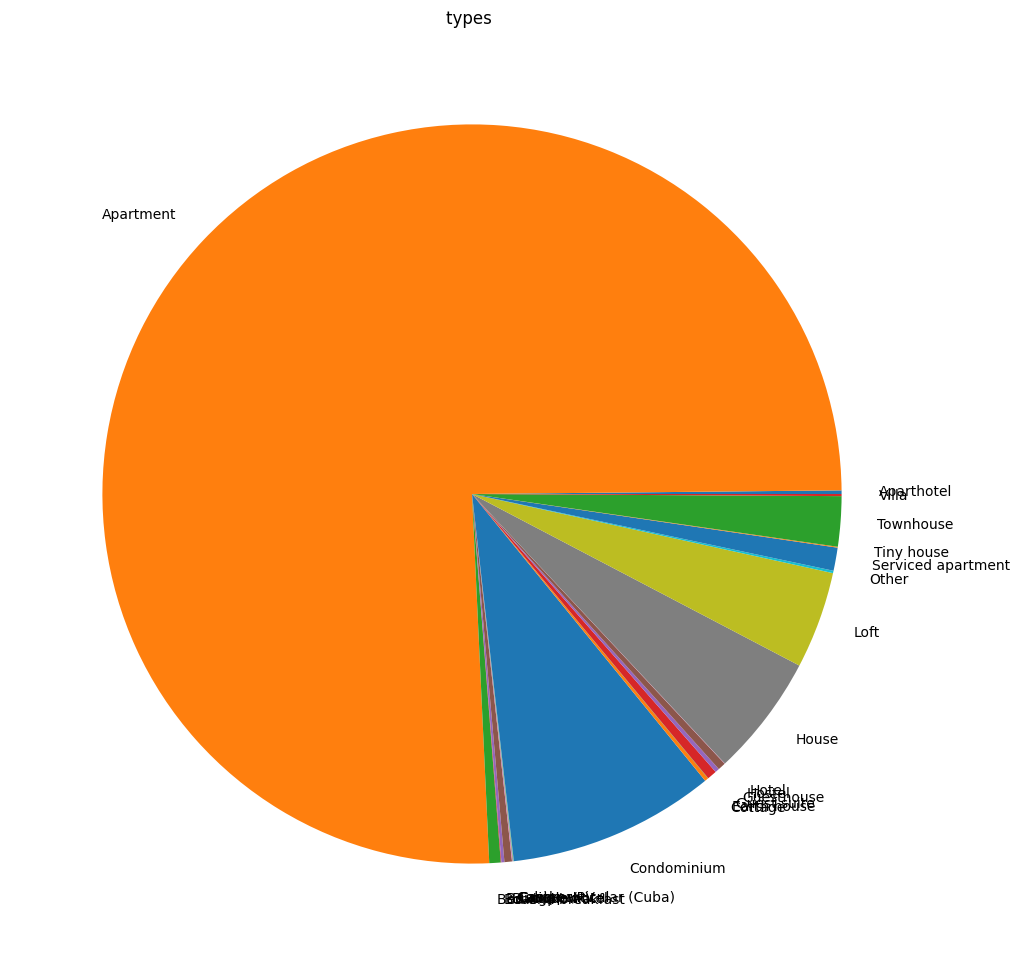

In [16]:
type_ = df_train.groupby('type').size()
type_.plot(kind='pie', subplots=True, figsize=(32, 12),shadow=False)
plt.title("types ")
plt.ylabel("")
plt.show()

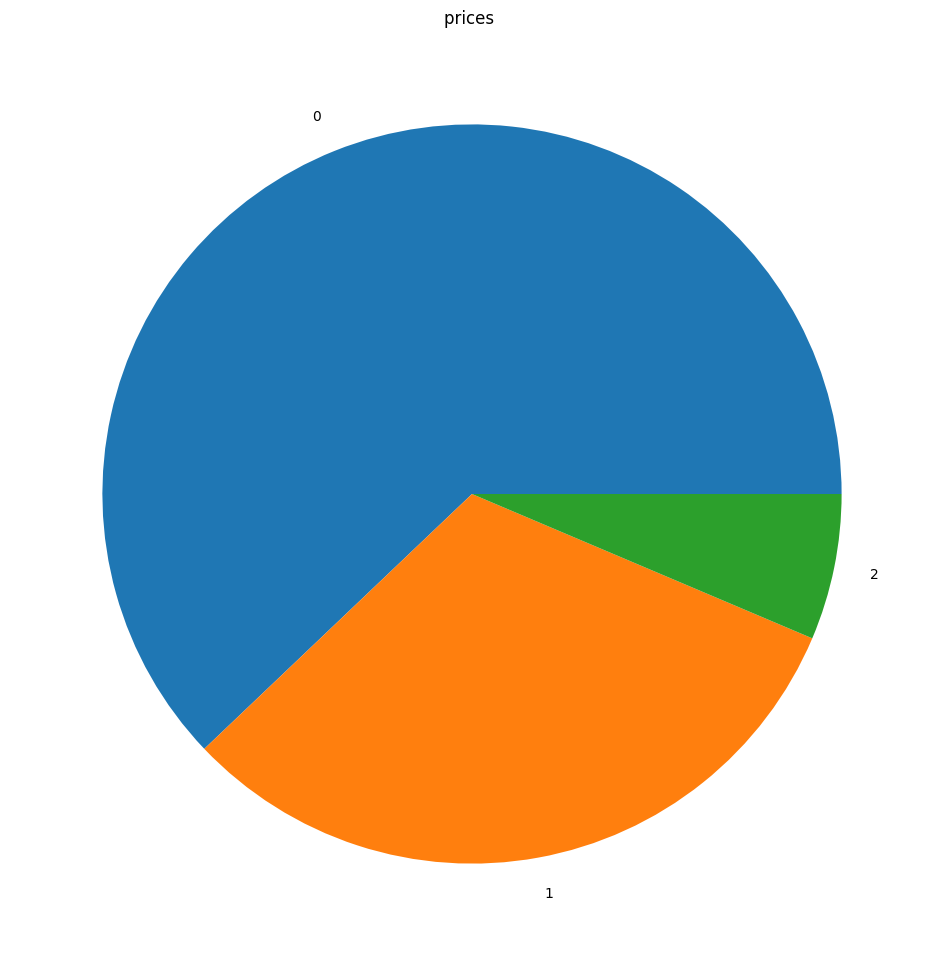

In [18]:
price_ = df_train.groupby('price').size()
price_.plot(kind='pie', subplots=True, figsize=(32, 12),shadow=False)
plt.title("prices ")
plt.ylabel("")
plt.show()

# preprocessing

check null

In [27]:
df_train.isna().sum()

summary    0
image      0
type       0
price      0
dtype: int64

In [5]:
df_train.dropna()

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,Apartment,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0


In [17]:
df_test.isna().sum()

id         0
summary    0
image      0
dtype: int64

check for duplicates

In [18]:
df_train.duplicated().sum()

0

In [19]:
df_test.duplicated().sum()

0

# text preprocessing

In [6]:
df_train["summary"] = df_train.summary.astype('str')
df_test["summary"] = df_test.summary.astype('str')

In [7]:
translator=Translator()
target_language = "en"
df_train["summary"] = df_train["summary"].apply(lambda x: translator.translate(text=x, dest=target_language).text)

In [8]:
df_test["summary"] = df_test["summary"].apply(lambda x: translator.translate(text=x, dest=target_language).text)

In [9]:
nltk.data.path.append('/kaggle/working/nltk_data') 

nltk.download('punkt', download_dir='/kaggle/working/nltk_data')       # Tokenizer Model
nltk.download('stopwords', download_dir='/kaggle/working/nltk_data')   # Stopword lists
nltk.download('wordnet', download_dir='/kaggle/working/nltk_data')

[nltk_data] Downloading package punkt to /kaggle/working/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...


True

In [10]:
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))

In [11]:
def clean_text(text, for_embedding=False):
    """ steps:
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and lemmatize
        - return the clean text
    """
    re_wspace = re.compile(r"\s+", re.IGNORECASE)
    re_tags = re.compile(r"<[^>]+>")
    re_ASII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    re_single_char = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        re_ASII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        re_single_char = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(re_tags, " ", text)
    text = re.sub(re_ASII, " ", text)
    text = re.sub(re_single_char, " ", text)
    text = re.sub(re_wspace, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no lemmatization, lowering, punctuation, or stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            lemmatizer.lemmatize(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

In [ ]:
# Clean texts training data 
df_train["summary"] = df_train.loc[df_train["summary"].str.len() > 0, "summary"] # get all text data the length it greater than 0 in training data
# call clean_text of method to apply it on text_clean feature in traing data
df_train["summary"] = df_train["summary"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x  # check if text is instance of string
) 

In [37]:
#df_train["clean_summary"]=df_train["summary"].apply(clean_text)

In [13]:
x_train_text=df_train['summary']
x_test_text=df_test['summary']

# tokenize

It requires some debates:
Based on word frequency, num_words is the maximum number of words to retain. We shall retain only the most often occurring num_words-1 words.
filters a string whose characters are all characters that the texts will be filtered to remove. By default, all punctuation is included, along with tabs and line breaks, but without the'character.
reduce boolean. If the texts should be changed to lowercase.
divide the str. Word split separator.
char_level All characters will be regarded as tokens if this is the case.
When making text_to_sequence calls, the oov_token, if provided, will be added to word_index and used to substitute words that are not in the dictionary.



In [14]:
#vocabulary size
vocab_size = 40000  
#max length of the array for each sequence
max_len = 100

# build vocabulary from training set
# initialize tokenizer with a vocabulary size of 40000
tokenizer = Tokenizer(num_words=vocab_size)
# update the vocabulary by fitting on the corpus of text contained in summary text descriptions, keeping only the most common 40000 words
tokenizer.fit_on_texts(x_train_text)


#pad_sequences transforms a list of sequences into a 2D Numpy array of shape (num_samples, max_len).
def _preprocess(list_of_text):
  #transforms each text in texts to sequence of integers      #maximum length of all sequences       #specifying padding and truncating before sequence
  return pad_sequences(tokenizer.texts_to_sequences(list_of_text),  maxlen=max_len,   padding='pre',  truncating = 'pre')

In [15]:
# preprocess and tokenize list of training sequences(padding is done inside): 
x_train_text = _preprocess(x_train_text) 

#print the shape of new data after applying the preprocessing on it
print(x_train_text.shape)

(7627, 100)


In [16]:
x_test_text = _preprocess(x_test_text) 
print(x_test_text.shape)

(7360, 100)


# image preprocessing

In [76]:
def load_image(file):
    try:
        image = Image.open( file ).convert('LA').resize((64, 64))
        arr = np.array(image)
    except:
        arr = np.zeros((64, 64, 2))
    return arr

In [77]:
# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(df_train.image)])
x_test_image = np.array([load_image(i) for i in tqdm(df_test.image)])


  0%|          | 0/7627 [00:00<?, ?it/s]

  0%|          | 0/7360 [00:00<?, ?it/s]

# labels Encoding:

In [20]:
df_train['type'] = df_train.type.astype('category').cat.codes
df_train['price'] = df_train.price.astype('category').cat.codes

In [21]:
y_train_type=df_train['type']
y_train_price=df_train['price']

In [22]:
len_type = len(df_train['type'].unique())    # number of unique labels for rental type
len_price = len(df_train['price'].unique())  # number of unique labels for price 
print('unique values for type category', len_type, y_train_type.unique())
print('unique values for price category', len_price, y_train_price.unique()) 

unique values for type category 24 [ 1 17 22 10 18 20  5  2  8  4 23 13 15 16 14 11 19  0 21  3  6 12  7  9]
unique values for price category 3 [1 0 2]


# model

# Trial 1

# text part

In [24]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))                  # input shape for batches of text sequences (300 words long)
in_image = keras.Input(batch_shape=(None, 64, 64, 2))               # input shape for batches of images (size: 64x64x2)


# Embedding

We were able to transform each word into a fixed-length vector of a predetermined size by using the embedding layer. Instead of only having 0s and 1s, the resulting vector is dense and contains real values. Together with smaller dimensions, the fixed length of word vectors aids in improving word representation.

Next, in order to lower the embedding's rank, we computed the mean of the embeddings using the averaged layer.

In [25]:
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text) # get our word embeddings

In [26]:
class ReduceMeanLayer(Layer):
    def __init__(self, axis=None, **kwargs):
        super(ReduceMeanLayer, self).__init__(**kwargs)
        self.axis = axis
    def call(self, inputs):
        # Apply the TensorFlow reduce_mean function
        return tf.reduce_mean(inputs, axis=self.axis)
    
    
averaged = ReduceMeanLayer(axis=-1)(embedded)    

computes the mean of the elements across the dimensions in axis to lower input_tensor along the provided dimensions.

# image part 

In [27]:
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image)           # convolutional layer with 10 filters, and a 16x16 mask, no padding
pl = MaxPool2D((16, 16))(cov1)                                      # max pooling with a 16x16 mask, reducing the size to 3x3x10
flattened = Flatten()(pl)    

In [71]:
print("Shape of averaged:", averaged.shape)
print("Shape of flattened:", flattened.shape)

Shape of averaged: (None, 100)
Shape of flattened: (None, 90)


In [28]:
class ConcatLayer(Layer):
    def __init__(self, axis, **kwargs):
        super(ConcatLayer, self).__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.concat(inputs, axis=self.axis)
    
# Fusion - combining both using custom ConcatLayer
fused = ConcatLayer(axis=-1)([averaged, flattened]) # concatenate text features with images

# Data splitting

In [29]:
from sklearn.model_selection import train_test_split
x_tr_text,x_val_text,y_tr_type,y_val_type=train_test_split(x_train_text,y_train_type,test_size=.3,random_state=0)
x_tr_image,x_val_image,y_tr_price,y_val_price=train_test_split(x_train_image,y_train_price,test_size=.3,random_state=0)

In [109]:
# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,  # text inputs
        'image': in_image    # images inputs
    },
    outputs={
        'type': p_type,      # label 1: type category [0-23]
        'price': p_price     # label 2: price category (0, 1, or 2)
    }
)


# compile model with optimizer, loss values for each task, 
# loss weights for each task.
model.compile(
    optimizer=Adam(.001),       # using Adam for optimization with learning rate (.001)

    # measuring sparse categorical cross-entropy loss for both price and type labels
    # sparse categorical cross-entropy is used since our labels are integers
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    # Not equally weight the loss w.r.t. both labels as we care more with price
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    # evaluation metric for this task is accuracy, so we measure sparse categorical accuracy for both targets
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)

# display the structure of the model that we defined  
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 64, 64, 2) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 49, 49,    │      5,130 │ input_layer_5[0]… │
│                     │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 100, 300)  │ 12,000,000 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 3, 3, 10)  │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduce_mean_layer_1 │ (None, 100)       │          0 │ embedding_2[0][0] │
│ (ReduceMeanLayer)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 90)        │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer        │ (None, 190)       │          0 │ reduce_mean_laye… │
│ (ConcatLayer)       │                   │            │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ price (Dense)       │ (None, 3)         │        573 │ concat_layer[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ type (Dense)        │ (None, 24)        │      4,584 │ concat_layer[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 12,010,287 (45.82 MB)

 Trainable params: 12,010,287 (45.82 MB)

 Non-trainable params: 0 (0.00 B)

# model training

In [110]:
history = model.fit(
                    x={'summary': x_train_text,
                        'image': x_train_image },
    
                    y={'type': y_train_type,
                        'price': y_train_price, },
    
                    epochs=10,
                    batch_size=16,
                    validation_split=0.2,verbose=1
)

Epoch 1/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 58s 147ms/step - loss: 1.3320 - price_SparseCategoricalAccuracy: 0.6046 - type_SparseCategoricalAccuracy: 0.6444 - val_loss: 0.9080 - val_price_SparseCategoricalAccuracy: 0.6278 - val_type_SparseCategoricalAccuracy: 0.7647
Epoch 2/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 61s 160ms/step - loss: 0.9046 - price_SparseCategoricalAccuracy: 0.6447 - type_SparseCategoricalAccuracy: 0.7542 - val_loss: 0.8890 - val_price_SparseCategoricalAccuracy: 0.6383 - val_type_SparseCategoricalAccuracy: 0.7647
Epoch 3/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 84s 166ms/step - loss: 0.8788 - price_SparseCategoricalAccuracy: 0.6536 - type_SparseCategoricalAccuracy: 0.7537 - val_loss: 0.8763 - val_price_SparseCategoricalAccuracy: 0.6265 - val_type_SparseCategoricalAccuracy: 0.7647
Epoch 4/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 77s 154ms/step - loss: 0.8473 - price_SparseCategoricalAccuracy: 0.6870 - type_SparseCategoricalAccuracy: 0.7551 - val_loss: 0.8727 - val_price_SparseCategoricalAccuracy: 

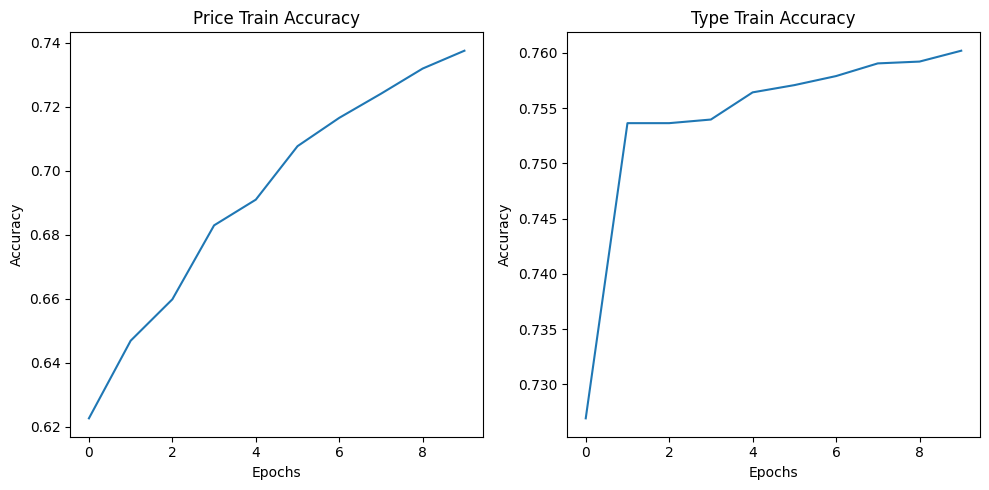

In [119]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['price_SparseCategoricalAccuracy'])
plt.title('Price Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['type_SparseCategoricalAccuracy'])
plt.title('Type Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

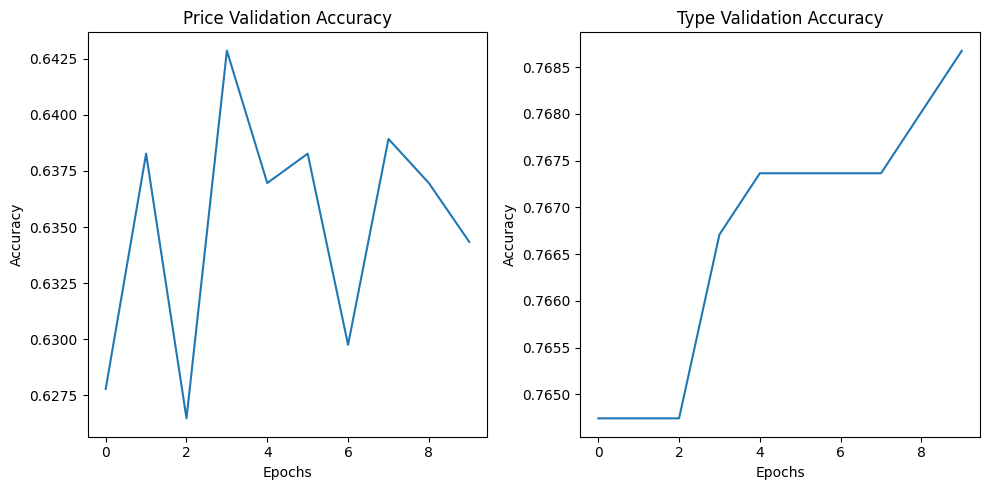

In [121]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_price_SparseCategoricalAccuracy'])
plt.title('Price Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['val_type_SparseCategoricalAccuracy'])
plt.title('Type Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [122]:
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
type_predicted=y_predict['type']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step
[[0.53622305 0.3867035  0.07707344]
 [0.7110392  0.23687747 0.05208326]
 [0.40213802 0.5234437  0.07441834]
 ...
 [0.8134806  0.15895246 0.02756693]
 [0.9066304  0.07134894 0.02202061]
 [0.5188138  0.42990378 0.05128237]]
[0 0 1 ... 0 0 0]


In [124]:
d=pd.DataFrame(
    {'id': df_test.id,
     'price': price_category_predicted}
).to_csv('submission1.csv', index=False)

# Trial2

To avoid vanishing gradients, I'll try to employ the LSTM layer.

the same setup as the prior experiment, but we'll add the LSTM layer to the text portion and make the following changes:
In many aspects, LSTMs are superior to RNN and traditional feed-forward neural networks. Their ability to retain certain patterns in memory over extended periods of time is the reason for this. The model can determine the true meaning of the input string and produce the most accurate output class if the proper layers of embedding and encoding are used in the LSTM.

# LSTM

In [129]:
class SpatialDropout1D(Layer):
    def __init__(self, rate, **kwargs):
        super(SpatialDropout1D, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs):
        # Apply dropout with random masking along the spatial dimension (axis=1)
        mask = tf.random.uniform(tf.shape(inputs), minval=0, maxval=1, dtype=tf.float32)
        mask = tf.cast(mask > self.rate, dtype=tf.float32)
        return inputs * mask

In [143]:
output=SpatialDropout1D(0.2)(embedded)
output=LSTM(256,dropout=0.2)(output)

In [140]:
# image part 
# simple conv2d
cov = Conv2D(64, (16, 16))(in_image)
# add max pooling layer
pl = MaxPool2D((12, 12))(cov)
#add flatten layer
flattened = Flatten()(pl)

In [144]:
print("Shape of output:", output.shape)
print("Shape of flattened:", flattened.shape)

Shape of output: (None, 256)
Shape of flattened: (None, 1024)


In [146]:
# Fusion - combining both using custom ConcatLayer
fused = ConcatLayer(axis=-1)([output, flattened]) # concatenate text features with images

In [148]:
# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,  # text inputs
        'image': in_image    # images inputs
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)
# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 64, 64, 2) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 100, 300)  │ 12,000,000 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 49, 49,    │     32,832 │ input_layer_5[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_3 │ (None, 100, 300)  │          0 │ embedding_2[0][0] │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 4, 4, 64)  │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 256)       │    570,368 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 1024)      │          0 │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer_4      │ (None, 1280)      │          0 │ lstm_5[0][0],     │
│ (ConcatLayer)       │                   │            │ flatten_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ price (Dense)       │ (None, 3)         │      3,843 │ concat_layer_4[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ type (Dense)        │ (None, 24)        │     30,744 │ concat_layer_4[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 12,637,787 (48.21 MB)

 Trainable params: 12,637,787 (48.21 MB)

 Non-trainable params: 0 (0.00 B)

In [149]:
history = model.fit(
                    x={'summary': x_train_text,
                        'image': x_train_image },
    
                    y={'type': y_train_type,
                        'price': y_train_price, },
    
                    epochs=10,
                    batch_size=16,
                    validation_split=0.2,verbose=1
)

Epoch 1/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 137s 346ms/step - loss: 0.9614 - price_SparseCategoricalAccuracy: 0.6519 - type_SparseCategoricalAccuracy: 0.7451 - val_loss: 0.8553 - val_price_SparseCategoricalAccuracy: 0.6363 - val_type_SparseCategoricalAccuracy: 0.7641
Epoch 2/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 156s 383ms/step - loss: 0.8276 - price_SparseCategoricalAccuracy: 0.6795 - type_SparseCategoricalAccuracy: 0.7523 - val_loss: 0.8476 - val_price_SparseCategoricalAccuracy: 0.6415 - val_type_SparseCategoricalAccuracy: 0.7634
Epoch 3/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 194s 363ms/step - loss: 0.7949 - price_SparseCategoricalAccuracy: 0.6963 - type_SparseCategoricalAccuracy: 0.7535 - val_loss: 0.8350 - val_price_SparseCategoricalAccuracy: 0.6501 - val_type_SparseCategoricalAccuracy: 0.7628
Epoch 4/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 137s 351ms/step - loss: 0.7537 - price_SparseCategoricalAccuracy: 0.7001 - type_SparseCategoricalAccuracy: 0.7667 - val_loss: 0.8411 - val_price_SparseCategoricalAccura

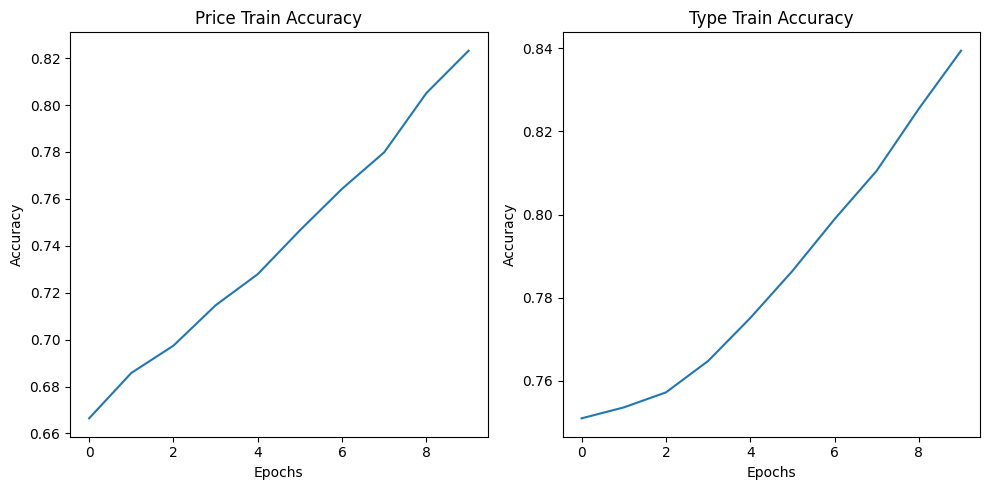

In [150]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['price_SparseCategoricalAccuracy'])
plt.title('Price Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['type_SparseCategoricalAccuracy'])
plt.title('Type Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

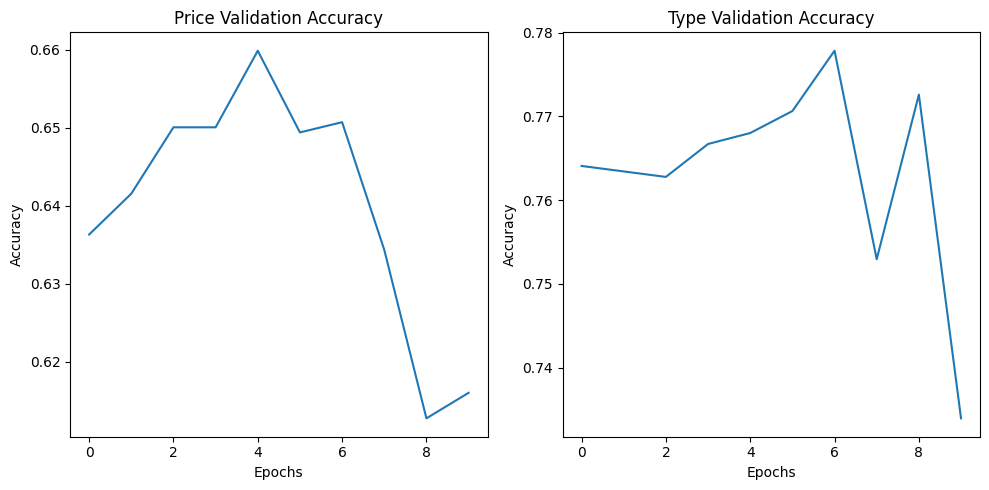

In [151]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_price_SparseCategoricalAccuracy'])
plt.title('Price Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['val_type_SparseCategoricalAccuracy'])
plt.title('Type Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [152]:
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
type_predicted=y_predict['type']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step
[[3.2331961e-01 5.2917898e-01 1.4750144e-01]
 [9.9769902e-01 1.7777657e-03 5.2335794e-04]
 [5.8685315e-01 4.0256289e-01 1.0584089e-02]
 ...
 [9.7452980e-01 1.9729730e-02 5.7404609e-03]
 [9.9011147e-01 6.6329949e-03 3.2555019e-03]
 [5.3005022e-01 3.7987950e-01 9.0070300e-02]]
[1 0 0 ... 0 0 0]


In [154]:
d=pd.DataFrame(
    {'id': df_test.id,
     'price': price_category_predicted}
).to_csv('submission2.csv', index=False)

# Trial 3

by using two BiDirectional layer

to help mitigate the vanishing gradient problem and enable the model to learn long-term dependencies more effectively.

In [32]:
output=Bidirectional(LSTM(150, return_sequences=True))(embedded) 
output=Bidirectional(LSTM(150))(output)

In [34]:
fused = ConcatLayer(axis=-1)([output, flattened])

In [35]:
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)
# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(learning_rate=0.001),
    
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 64, 64, 2) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100, 300)  │ 12,000,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 49, 49,    │      5,130 │ input_layer_1[0]… │
│                     │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 100, 300)  │    541,200 │ embedding[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 3, 3, 10)  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 300)       │    541,200 │ bidirectional[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 90)        │          0 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer_2      │ (None, 390)       │          0 │ bidirectional_1[… │
│ (ConcatLayer)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ price (Dense)       │ (None, 3)         │      1,173 │ concat_layer_2[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ type (Dense)        │ (None, 24)        │      9,384 │ concat_layer_2[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 13,098,087 (49.97 MB)

 Trainable params: 13,098,087 (49.97 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(
                    x={'summary': x_train_text,
                        'image': x_train_image },
    
                    y={'type': y_train_type,
                        'price': y_train_price, },
    
                    epochs=10,
                    batch_size=16,
                    validation_split=0.2,verbose=1
)

Epoch 1/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 215s 542ms/step - loss: 2.0003 - price_SparseCategoricalAccuracy: 0.5929 - type_SparseCategoricalAccuracy: 0.7447 - val_loss: 1.7056 - val_price_SparseCategoricalAccuracy: 0.6586 - val_type_SparseCategoricalAccuracy: 0.7647
Epoch 2/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 254s 520ms/step - loss: 1.6462 - price_SparseCategoricalAccuracy: 0.6943 - type_SparseCategoricalAccuracy: 0.7552 - val_loss: 1.6721 - val_price_SparseCategoricalAccuracy: 0.6442 - val_type_SparseCategoricalAccuracy: 0.7726
Epoch 3/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 204s 527ms/step - loss: 1.3858 - price_SparseCategoricalAccuracy: 0.7399 - type_SparseCategoricalAccuracy: 0.7901 - val_loss: 1.8538 - val_price_SparseCategoricalAccuracy: 0.6488 - val_type_SparseCategoricalAccuracy: 0.7700
Epoch 4/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 198s 519ms/step - loss: 1.2868 - price_SparseCategoricalAccuracy: 0.7761 - type_SparseCategoricalAccuracy: 0.8073 - val_loss: 1.8200 - val_price_SparseCategoricalAccura

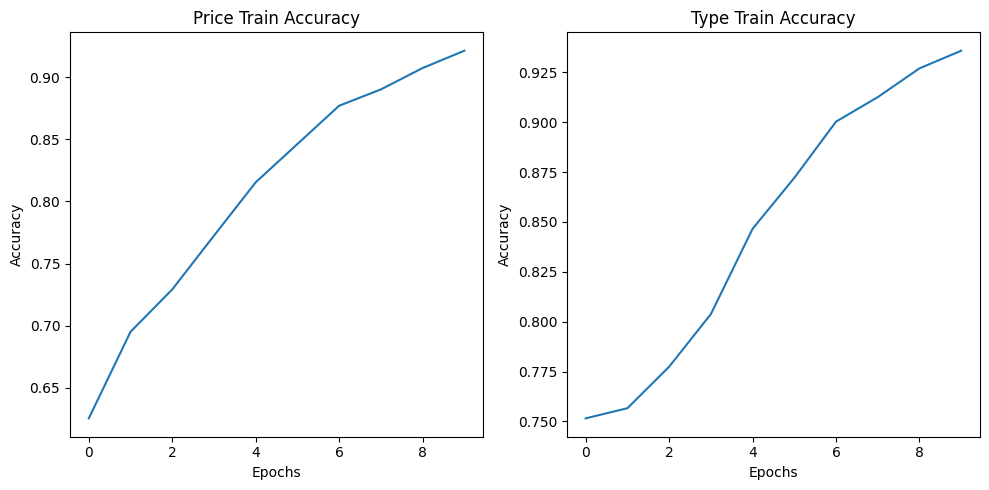

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['price_SparseCategoricalAccuracy'])
plt.title('Price Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['type_SparseCategoricalAccuracy'])
plt.title('Type Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

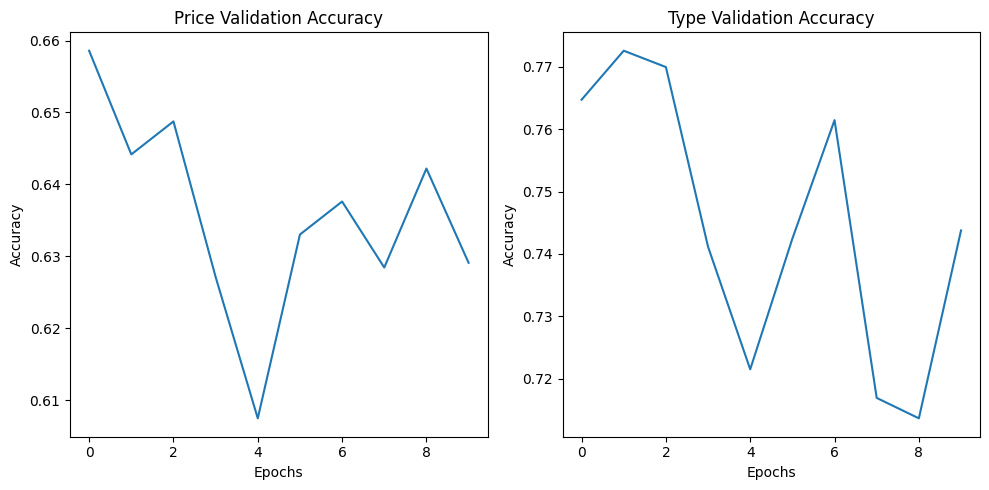

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_price_SparseCategoricalAccuracy'])
plt.title('Price Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['val_type_SparseCategoricalAccuracy'])
plt.title('Type Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [39]:
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
type_predicted=y_predict['type']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 ━━━━━━━━━━━━━━━━━━━━ 38s 161ms/step
[[4.41766605e-02 3.71936768e-01 5.83886504e-01]
 [9.99976337e-01 1.35726286e-05 9.99933764e-06]
 [9.69758511e-01 2.56995037e-02 4.54196846e-03]
 ...
 [6.03414237e-01 3.41274351e-01 5.53113483e-02]
 [9.97405767e-01 1.83049741e-03 7.63833988e-04]
 [9.27341402e-01 5.84969483e-02 1.41615495e-02]]
[2 0 0 ... 0 0 0]


In [40]:
d=pd.DataFrame(
    {'id': df_test.id,
     'price': price_category_predicted}
).to_csv('submission3.csv', index=False)

# trial 4

add Dropout layer in image part to avoid overfitting

In [42]:
conv=Conv2D(64,(16,16))(in_image)
pool=MaxPool2D(12,12)(conv)
drop=Dropout(0.3)(pool) #add dropout layer with 30%
flatten=Flatten()(drop)

In [44]:
fused = ConcatLayer(axis=-1)([output, flatten])

In [45]:
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)
model=keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)
# compile model
model.compile(optimizer=Adam(learning_rate=0.01),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 64, 64, 2) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 49, 49,    │     32,832 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100, 300)  │ 12,000,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 4, 4, 64)  │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 100, 300)  │    541,200 │ embedding[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 4, 4, 64)  │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 300)       │    541,200 │ bidirectional[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1024)      │          0 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer_4      │ (None, 1324)      │          0 │ bidirectional_1[… │
│ (ConcatLayer)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ price (Dense)       │ (None, 3)         │      3,975 │ concat_layer_4[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ type (Dense)        │ (None, 24)        │     31,800 │ concat_layer_4[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 13,151,007 (50.17 MB)

 Trainable params: 13,151,007 (50.17 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(
                    x={'summary': x_train_text,
                        'image': x_train_image },
    
                    y={'type': y_train_type,
                        'price': y_train_price, },
    
                    epochs=10,
                    batch_size=16,
                    validation_split=0.2,verbose=1
)

Epoch 1/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 218s 552ms/step - loss: 1.7376 - price_SparseCategoricalAccuracy: 0.6780 - type_SparseCategoricalAccuracy: 0.7471 - val_loss: 1.7855 - val_price_SparseCategoricalAccuracy: 0.6409 - val_type_SparseCategoricalAccuracy: 0.7615
Epoch 2/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 214s 560ms/step - loss: 1.4535 - price_SparseCategoricalAccuracy: 0.7282 - type_SparseCategoricalAccuracy: 0.7801 - val_loss: 1.8789 - val_price_SparseCategoricalAccuracy: 0.6258 - val_type_SparseCategoricalAccuracy: 0.7464
Epoch 3/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 210s 550ms/step - loss: 1.4553 - price_SparseCategoricalAccuracy: 0.7310 - type_SparseCategoricalAccuracy: 0.7844 - val_loss: 1.8066 - val_price_SparseCategoricalAccuracy: 0.6507 - val_type_SparseCategoricalAccuracy: 0.7595
Epoch 4/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 259s 543ms/step - loss: 1.3061 - price_SparseCategoricalAccuracy: 0.7562 - type_SparseCategoricalAccuracy: 0.7949 - val_loss: 1.8722 - val_price_SparseCategoricalAccura

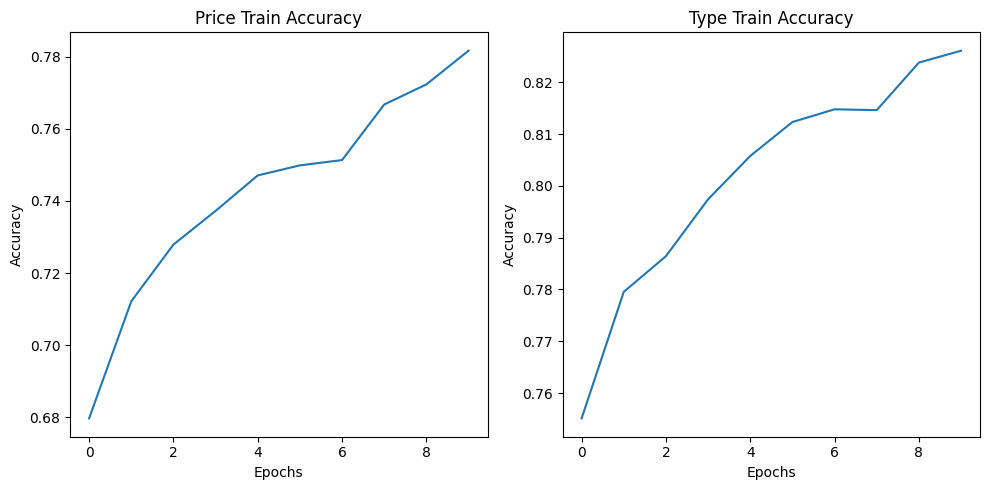

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['price_SparseCategoricalAccuracy'])
plt.title('Price Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['type_SparseCategoricalAccuracy'])
plt.title('Type Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

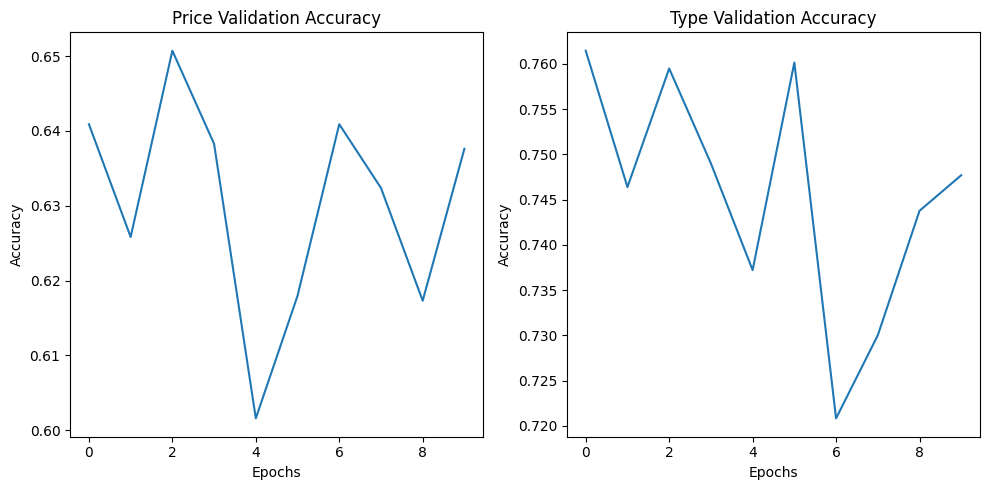

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_price_SparseCategoricalAccuracy'])
plt.title('Price Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['val_type_SparseCategoricalAccuracy'])
plt.title('Type Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [50]:
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
type_predicted=y_predict['type']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 ━━━━━━━━━━━━━━━━━━━━ 44s 188ms/step
[[5.7801723e-01 3.3480909e-01 8.7173529e-02]
 [9.9961096e-01 2.2078259e-04 1.6828545e-04]
 [8.4590203e-01 9.2606276e-02 6.1491694e-02]
 ...
 [9.2121965e-01 4.9071737e-02 2.9708605e-02]
 [9.9026978e-01 6.0317763e-03 3.6984608e-03]
 [2.9072836e-01 3.7838337e-01 3.3088821e-01]]
[0 0 0 ... 0 0 1]


In [51]:
d=pd.DataFrame(
    {'id': df_test.id,
     'price': price_category_predicted}
).to_csv('submission4.csv', index=False)

# trial 5

In order to prevent overfitting and help the model to detect more features, I add L2-regularization with dropout and two convolutional layers with two max pooling layers, two dropout layers, and learning rate=0.001.

In [54]:
# image
conv=Conv2D(32,(12,12))(in_image)
pool=MaxPool2D(2,2)(conv) #stride =2
drop=Dropout(0.3)(pool)
conv2=Conv2D(64,(12,12))(pool)
pool=MaxPool2D(2,2)(conv2)
drop=Dropout(0.3)(pool)
flatten=Flatten()(drop)

In [55]:
fused = ConcatLayer(axis=-1)([output, flatten])

In [57]:
#for multi-task 
#build one dense layer for each
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)
model=keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)
#to compile model
model.compile(optimizer=Adam(learning_rate=0.001),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 64, 64, 2) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 53, 53,    │      9,248 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 26, 26,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 15, 15,    │    294,976 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100, 300)  │ 12,000,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 7, 7, 64)  │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 100, 300)  │    541,200 │ embedding[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 7, 7, 64)  │          0 │ max_pooling2d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 300)       │    541,200 │ bidirectional[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 3136)      │          0 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer_5      │ (None, 3436)      │          0 │ bidirectional_1[… │
│ (ConcatLayer)       │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ price (Dense)       │ (None, 3)         │     10,311 │ concat_layer_5[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ type (Dense)        │ (None, 24)        │     82,488 │ concat_layer_5[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 13,479,423 (51.42 MB)

 Trainable params: 13,479,423 (51.42 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model.fit(
                    x={'summary': x_train_text,
                        'image': x_train_image },
    
                    y={'type': y_train_type,
                        'price': y_train_price, },
    
                    epochs=10,
                    batch_size=16,
                    validation_split=0.2,verbose=1
)

Epoch 1/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 229s 577ms/step - loss: 1.8051 - price_SparseCategoricalAccuracy: 0.7006 - type_SparseCategoricalAccuracy: 0.7361 - val_loss: 1.7642 - val_price_SparseCategoricalAccuracy: 0.6461 - val_type_SparseCategoricalAccuracy: 0.7588
Epoch 2/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 261s 576ms/step - loss: 0.9235 - price_SparseCategoricalAccuracy: 0.8445 - type_SparseCategoricalAccuracy: 0.8555 - val_loss: 1.9096 - val_price_SparseCategoricalAccuracy: 0.6330 - val_type_SparseCategoricalAccuracy: 0.7569
Epoch 3/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 220s 575ms/step - loss: 0.7710 - price_SparseCategoricalAccuracy: 0.8757 - type_SparseCategoricalAccuracy: 0.8830 - val_loss: 2.1013 - val_price_SparseCategoricalAccuracy: 0.6383 - val_type_SparseCategoricalAccuracy: 0.7529
Epoch 4/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 220s 577ms/step - loss: 0.5785 - price_SparseCategoricalAccuracy: 0.9022 - type_SparseCategoricalAccuracy: 0.9179 - val_loss: 2.3054 - val_price_SparseCategoricalAccura

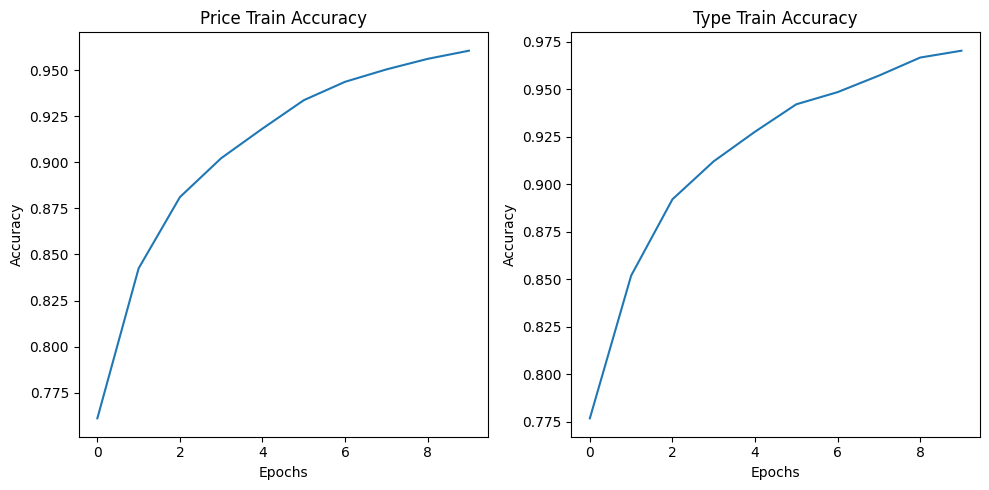

In [59]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['price_SparseCategoricalAccuracy'])
plt.title('Price Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['type_SparseCategoricalAccuracy'])
plt.title('Type Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

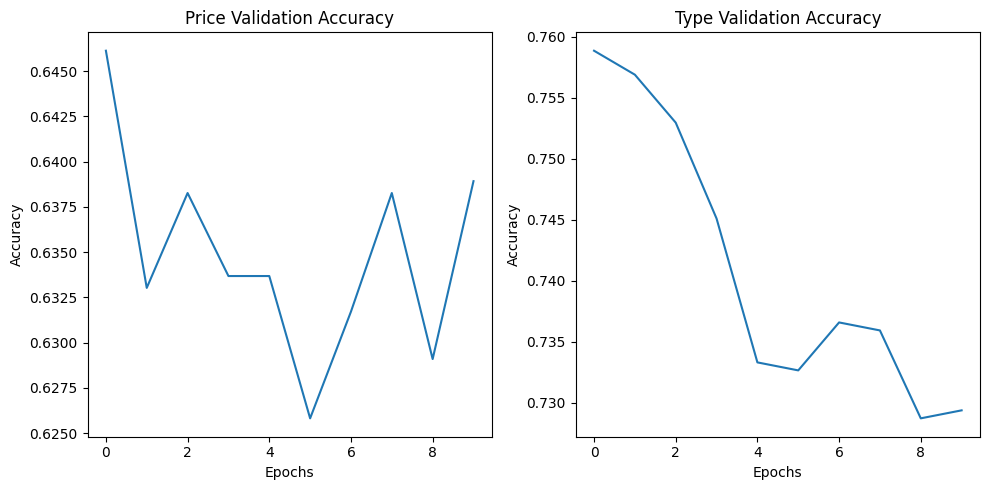

In [60]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_price_SparseCategoricalAccuracy'])
plt.title('Price Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['val_type_SparseCategoricalAccuracy'])
plt.title('Type Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [61]:
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
type_predicted=y_predict['type']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 ━━━━━━━━━━━━━━━━━━━━ 46s 198ms/step
[[3.0965930e-01 4.8848826e-01 2.0185238e-01]
 [9.9999791e-01 7.3486001e-07 1.3032221e-06]
 [8.7959772e-01 1.1879443e-01 1.6078354e-03]
 ...
 [9.3189484e-01 2.8947037e-02 3.9158054e-02]
 [9.9990052e-01 5.2242278e-05 4.7150181e-05]
 [4.2144224e-02 6.6171193e-01 2.9614368e-01]]
[1 0 0 ... 0 0 1]


In [62]:
d=pd.DataFrame(
    {'id': df_test.id,
     'price': price_category_predicted}
).to_csv('submission5.csv', index=False)

# trial 6

as trial 4 till now is the best i will reuse it but with 3 conv layers and  one bidirectional with 3 dropout =0.5 

In [64]:
output=Bidirectional(LSTM(256))(embedded)

In [65]:
conv=Conv2D(32,(12,12))(in_image)
pool=MaxPool2D(2,2)(conv)
drop=Dropout(0.5)(pool)

conv2=Conv2D(64,(12,12))(pool)
pool=MaxPool2D(1,1)(conv2)
drop=Dropout(0.5)(pool)

conv3=Conv2D(128,(12,12))(pool)
pool=MaxPool2D(1,1)(conv3)
drop=Dropout(0.5)(pool)
flatten=Flatten()(drop)

In [66]:
fused = ConcatLayer(axis=-1)([output, flatten])

In [67]:
#for multi-task 
#build one dense layer for each
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)
model=keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)
#to compile model
model.compile(optimizer=Adam(learning_rate=0.001),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 64, 64, 2) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 53, 53,    │      9,248 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 26, 26,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 15, 15,    │    294,976 │ max_pooling2d_6[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 15, 15,    │          0 │ conv2d_8[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 4, 4, 128) │  1,179,776 │ max_pooling2d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 4, 4, 128) │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100, 300)  │ 12,000,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 4, 4, 128) │          0 │ max_pooling2d_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 512)       │  1,140,736 │ embedding[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 2048)      │          0 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer_6      │ (None, 2560)      │          0 │ bidirectional_3[… │
│ (ConcatLayer)       │                   │            │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ price (Dense)       │ (None, 3)         │      7,683 │ concat_layer_6[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ type (Dense)        │ (None, 24)        │     61,464 │ concat_layer_6[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,693,883 (56.05 MB)

 Trainable params: 14,693,883 (56.05 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
history = model.fit(
                    x={'summary': x_train_text,
                        'image': x_train_image },
    
                    y={'type': y_train_type,
                        'price': y_train_price, },
    
                    epochs=10,
                    batch_size=16,
                    validation_split=0.2,verbose=1
)

Epoch 1/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 242s 618ms/step - loss: 1.7439 - price_SparseCategoricalAccuracy: 0.6638 - type_SparseCategoricalAccuracy: 0.7487 - val_loss: 1.9112 - val_price_SparseCategoricalAccuracy: 0.6193 - val_type_SparseCategoricalAccuracy: 0.7189
Epoch 2/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 258s 609ms/step - loss: 1.0895 - price_SparseCategoricalAccuracy: 0.8031 - type_SparseCategoricalAccuracy: 0.8344 - val_loss: 2.0119 - val_price_SparseCategoricalAccuracy: 0.6396 - val_type_SparseCategoricalAccuracy: 0.7477
Epoch 3/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 262s 609ms/step - loss: 0.8734 - price_SparseCategoricalAccuracy: 0.8368 - type_SparseCategoricalAccuracy: 0.8713 - val_loss: 2.1451 - val_price_SparseCategoricalAccuracy: 0.6435 - val_type_SparseCategoricalAccuracy: 0.7549
Epoch 4/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 234s 612ms/step - loss: 0.6509 - price_SparseCategoricalAccuracy: 0.8792 - type_SparseCategoricalAccuracy: 0.9039 - val_loss: 2.5056 - val_price_SparseCategoricalAccura

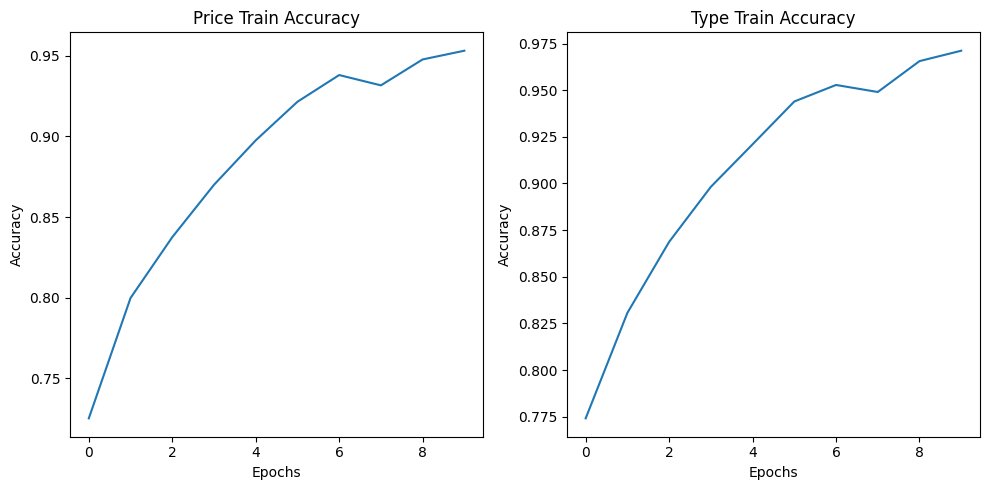

In [69]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['price_SparseCategoricalAccuracy'])
plt.title('Price Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['type_SparseCategoricalAccuracy'])
plt.title('Type Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

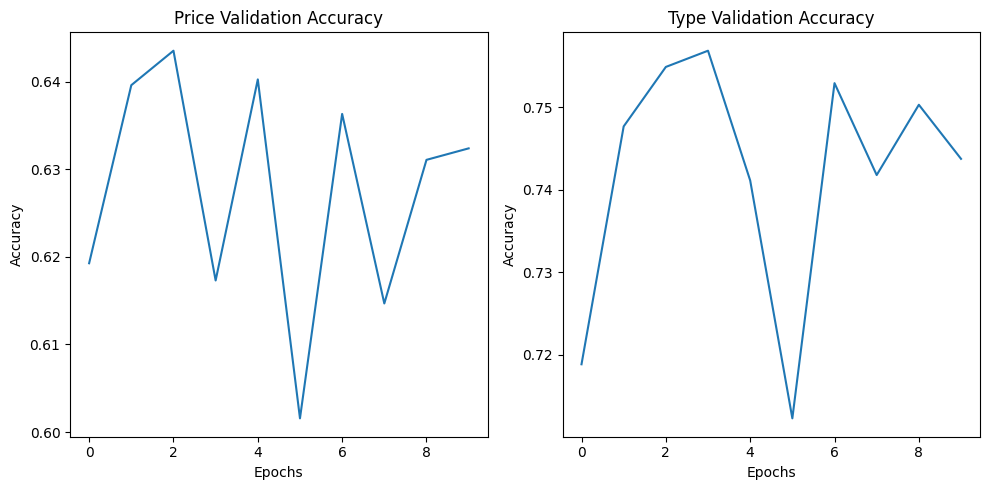

In [70]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_price_SparseCategoricalAccuracy'])
plt.title('Price Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['val_type_SparseCategoricalAccuracy'])
plt.title('Type Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [71]:
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
type_predicted=y_predict['type']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 ━━━━━━━━━━━━━━━━━━━━ 45s 192ms/step
[[2.1833865e-02 1.4504956e-01 8.3311665e-01]
 [9.9999994e-01 3.1366273e-08 3.2863923e-08]
 [9.3103677e-01 6.7511871e-02 1.4513214e-03]
 ...
 [9.9823427e-01 5.2702590e-04 1.2387130e-03]
 [9.9993223e-01 5.2400119e-05 1.5240855e-05]
 [2.4282515e-02 6.7408836e-01 3.0162928e-01]]
[2 0 0 ... 0 0 1]


In [72]:
d=pd.DataFrame(
    {'id': df_test.id,
     'price': price_category_predicted}
).to_csv('submission6.csv', index=False)

accuracy  decreased

the best trial is trial4